# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import plotly

## Linear Regression with one variable

### Data overview - Housing price

In [2]:
house_size = [1000, 1250, 1400, 1500, 1560]
house_price_k = [200, 250, 370, 350, 400]
data_house = pd.DataFrame({'house_size': house_size,
                           'house_price_k': house_price_k})
data_house

,house_size,house_price_k
0,1000,200
1,1250,250
2,1400,370
3,1500,350
4,1560,400


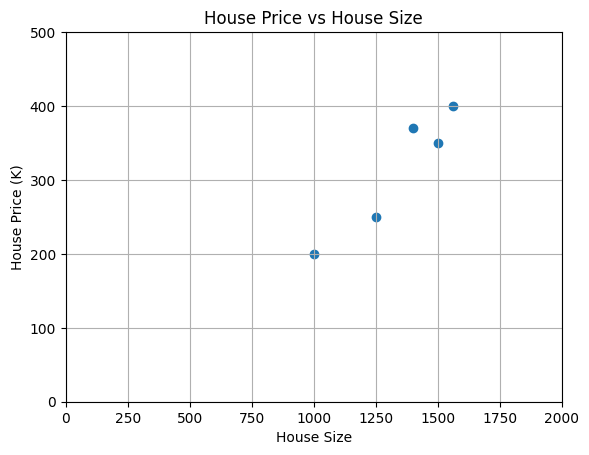

In [3]:
plt.scatter(data_house['house_size'], data_house['house_price_k'])
plt.xlabel('House Size')
plt.ylabel('House Price (K)')
plt.title('House Price vs House Size')
plt.grid(True)
# axis limit
plt.xlim(0, 2000)
plt.ylim(0, 500)
plt.show()

### Hypothesis

We will apply a supervised learning algorithm (i.e., linear regression in this case) to propose a hypothesis $h$ with a given dataset. The hypothesis $h$ determines an estimated "House Price (k)" ($y$) based on a given "House Size" ($x$). In short, The hypothesis $h$ is a function of $x$ that maps $x$ to $y$.

$$
y = h(x) = \beta_0 + \beta_1 x
$$

We can try to plug in different values of $\beta_0$ and $\beta_1$ to see how the hypothesis $h$ line looks like. To simply the code, we need to define a plotting function that takes three parameters: dataset, $\beta_0$, and $\beta_1$

In [4]:
def plot_house(data, b0, b1):
    # scatter plot
    plt.scatter(data['house_size'], data['house_price_k'])
    # hypothesis line
    x_series = np.linspace(0, 2000, 100)
    y_series = b0 + b1 * x_series
    plt.plot(x_series, y_series, 'r')
    # plot labels
    plt.title('House Price vs House Size')
    plt.xlabel('House Size')
    plt.ylabel('House Price (K)')
    # axis limit
    plt.xlim(0, 2000)
    plt.ylim(0, 500)
    # show plot
    plt.grid(True)
    plt.show()

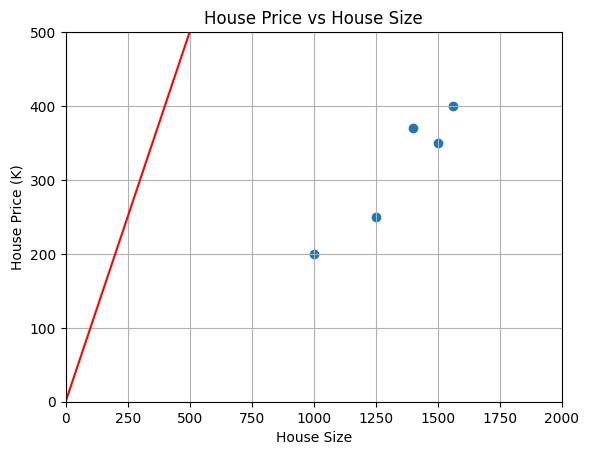

In [5]:
plot_house(data=data_house, b0=0, b1=1)

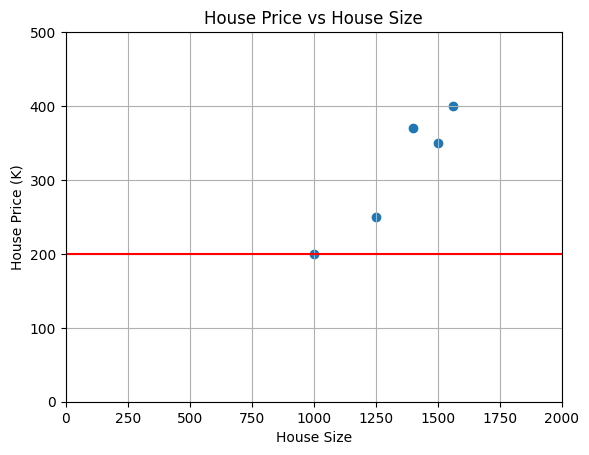

In [6]:
plot_house(data=data_house, b0=200, b1=0)

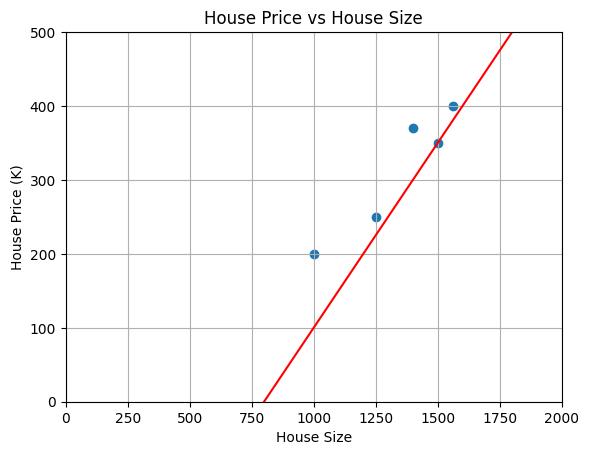

In [7]:
plot_house(data=data_house, b0=-400, b1=0.5)

### Loss function (mean squared error)

To evaluate the hypothesis $h$, we need to define a loss function. The loss function measures the difference between the estimated value ($h(x)$) and the actual value ($y$). The loss function is defined as

$$

f(\beta_0, \beta_1) = \frac{1}{n} \sum_{i=1}^n (h(x_{i}) - y_{i})^2 

$$
$$
h(x_{i}) = \beta_0 + \beta_1 x_{i}
$$

Where $x^(i)$ and $y^(i)$ are the $i$-th training example. $n$ is the number of training examples. The loss function is also called the mean squared error (MSE).

In [8]:
def loss_func(data, b0, b1):
    # calculate loss
    loss = 0
    for i in range(len(data)):
        x = data.loc[i, 'house_size']
        y = data.loc[i, 'house_price_k']
        loss += (y - (b0 + b1 * x)) ** 2
    return loss / len(data)

And you can check the loss function by plugging in different values of $\beta_0$ and $\beta_1$.

In [9]:
loss_func(data_house, b0=0, b1=1)

1073800.0

In [10]:
loss_func(data_house, b0=200, b1=0)

18780.0

In [11]:
loss_func(data_house, b0=-400, b1=0.5)

3185.0

We can generate a loss surface by plotting the loss function with respect to $\beta_0$ and $\beta_1$. The loss surface is a 3D plot that shows the loss function with respect to $\beta_0$ and $\beta_1$. The loss surface is shown below.

In [12]:
# generate loss surface
b0_series = np.linspace(-1000, 1000, 100)
b1_series = np.linspace(-1, 1, 100)
b0_grid, b1_grid = np.meshgrid(b0_series, b1_series)
loss_grid = np.zeros((len(b0_series), len(b1_series)))
for i in range(len(b0_series)):
    for j in range(len(b1_series)):
        loss_grid[i, j] = loss_func(data=data_house,
                                    b0=b0_series[i],
                                    b1=b1_series[j])
# plot loss surface
import plotly.graph_objs as go
trace = go.Surface(x=b0_series, y=b1_series, z=loss_grid.T)
layout = go.Layout(
                title='Loss Surface',
                scene=dict(
                        xaxis=dict(title='b0'),
                        yaxis=dict(title='b1'),
                        zaxis=dict(title='SSE')),
                width=900, height=900,
                margin=dict(r=20, l=10, b=10, t=50))
fig = go.Figure(data=[trace], layout=layout)
fig.show()

Let's try $\beta s$ that seems to be the minimum of the loss surface.

In [13]:
loss_func(data_house, b0=-150, b1=0.35)

589.4500000000007

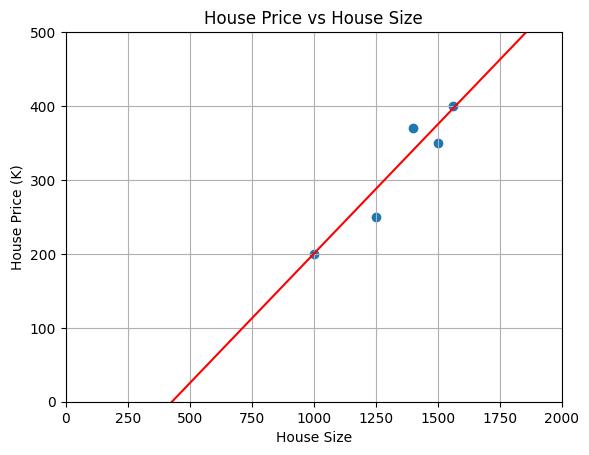

In [14]:
plot_house(data=data_house, b0=-150, b1=0.35)

### Basic linear algebra

Here are some basic linear algebra operations that we will use in this course.

#### Matrix multiplication

$$

\begin{bmatrix}
a & b \\
c & d \\
e & f
\end{bmatrix}
\begin{bmatrix}
g & h\\
i & j
\end{bmatrix}
=
\begin{bmatrix}
a g + b i & a h + b j \\
c g + d i & c h + d j \\
e g + f i & e h + f j
\end{bmatrix}

$$


$$

AB \neq BA

$$


#### Matrix transpose

$$

\begin{bmatrix}
a & b \\
c & d \\
e & f
\end{bmatrix}^T
=
\begin{bmatrix}
a & c & e \\
b & d & f
\end{bmatrix}

$$

We sometimes use $A$' instead of $A^T$ to denote the transpose of $A$.

There are three more matrix transpose rules:

$$

(A + B)^T = A^T + B^T

$$

$$

(AB)^T = B^T A^T

$$

This only works when $(ABC)$ is a scaler

$$

(ABC)^T = C^T B^T A^T

$$


#### Matrix inverse

$$

A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}\\

$$

$$
A^{-1} = \frac{1}{ad - bc} \begin{bmatrix}

d & -b \\
-c & a
\end{bmatrix}



$$

$$

A^{-1} A = I\\

A A^{-1} = I

$$


#### Matrix derivative

$$
\begin{split}

\frac{\partial \beta^{T}A\beta}{\partial \beta} &= {2\beta^{T}A}\\
                                                &={2A\beta}

\end{split}

$$


### Matrix representation

So how do we calculate the best hypothesis $h$ that can minimize the loss? The hypothesis $h$ can be written in a matrix form as follows:

$$
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
=
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_m
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_m
\end{bmatrix}
$$

where $\epsilon$ is the error term. The matrix form of the hypothesis $h$ is as follows:

$$
\mathbf{y} = \mathbf{X} \mathbf{\beta} + \mathbf{\epsilon}

$$

where $\mathbf{y}$ is a $m \times 1$ vector, $\mathbf{X}$ is a $m \times 2$ matrix, $\mathbf{\beta}$ is a $2 \times 1$ vector, and $\mathbf{\epsilon}$ is a $m \times 1$ vector.



In our dataset, the formula should look like this:

$$
\begin{bmatrix}
200 \\
250 \\
370 \\
350 \\
400
\end{bmatrix}
=
\begin{bmatrix}
1 & 1000 \\
1 & 1250 \\
1 & 1400 \\
1 & 1500 \\
1 & 1560
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\epsilon_3 \\
\epsilon_4 \\
\epsilon_5
\end{bmatrix}
$$

This is equivalent to the following linear equations:

$$
200 = \beta_0 + 1000 \beta_1 + \epsilon_1\\
250 = \beta_0 + 1250 \beta_1 + \epsilon_2\\
370 = \beta_0 + 1400 \beta_1 + \epsilon_3\\
350 = \beta_0 + 1500 \beta_1 + \epsilon_4\\
400 = \beta_0 + 1560 \beta_1 + \epsilon_5
$$




### Ordinary Least Squares

The Ordinary Least Squares (OLS) is a method to estimate the parameters $\beta_0$ and $\beta_1$ in the hypothesis $h$ by minimizing the sum of squared errors (SSE). The SSE is defined as follows:

$$
\text{SSE} = \sum_{i=1}^m (y_i - h(x_i))^2
$$

Or in matrix form:

$$
\text{SSE} = (\mathbf{y} - \mathbf{X} \mathbf{\beta})^T (\mathbf{y} - \mathbf{X} \mathbf{\beta})
$$


The minimization problem can be extended as

$$
\begin{split}
    arg \min \text{SSE} = arg \min_{\beta} f(\beta)
    &= arg \min_{\beta} (\mathbf{y} - \mathbf{X} \mathbf{\beta})^T (\mathbf{y} - \mathbf{X} \mathbf{\beta}) \\
    &= arg \min_{\beta}(\mathbf{y}^T - \beta^T\mathbf{X}^T)(\mathbf{y} - \mathbf{X}\beta) \\
    &= arg \min_{\beta} \mathbf{y}^T\mathbf{y} - \mathbf{y}^T\mathbf{X}\beta - \beta^T\mathbf{X}^T\mathbf{y} + \beta^T\mathbf{X}^T\mathbf{X}\beta  \\
    &= arg \min_{\beta} \mathbf{y}^T \mathbf{y} - 2 \mathbf{y}^T \mathbf{X} \mathbf{\beta} + \mathbf{\beta}^T \mathbf{X}^T \mathbf{X} \mathbf{\beta} \\
\end{split}
$$

Find the partial derivatives of $f(\beta)$ with respect to $\beta$ and set it to zero:

$$
    \frac{\partial f}{\partial \beta} = \beta^T\mathbf{X}^T\mathbf{X} - \mathbf{X}^T\mathbf{y} = 0
$$

$$
    \beta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$


### Solve the OLS problem on our dataset

Now, we can plug in our dataset to this formula to obtain the optmium $\beta$. First, we need to define $X$ and $y$ in Python.

In [15]:
X = data_house['house_size']
y = data_house['house_price_k']
X = np.array(X)
X = np.vstack([np.ones(len(X)), X]).T # add intercept
y = np.array(y)
# show
display("X:", X)
display("y:", y)

'X:'

array([[1.00e+00, 1.00e+03],
       [1.00e+00, 1.25e+03],
       [1.00e+00, 1.40e+03],
       [1.00e+00, 1.50e+03],
       [1.00e+00, 1.56e+03]])

'y:'

array([200, 250, 370, 350, 400])

Obtain the $\beta$ based on the formula:

$$
    \beta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
    \tag 1
$$


In [16]:
XtX = np.dot(X.T, X)
XtXi = np.linalg.inv(XtX)
Xy = np.dot(X.T, y)
b = np.dot(XtXi, Xy)
print(b)

[-169.78139905    0.36049285]


We can wrap the computation as a solver function, which takes `X` and `y`as input parameters.

In [17]:
def solve_OLS(X, y):
    XtX = np.dot(X.T, X)
    XtXi = np.linalg.inv(XtX)
    Xy = np.dot(X.T, y)
    b = np.dot(XtXi, Xy)
    return b

Should return the same $\beta$ as the previous computation.

In [18]:
solve_OLS(X, y)

array([-169.78139905,    0.36049285])

Great! Now we have the optimal $\beta_0$ = -169.78 and $\beta_1$ = 0.36. Let's validate this result.

In [19]:
loss_func(data_house, b0=b[0], b1=b[1])

552.5278219395883

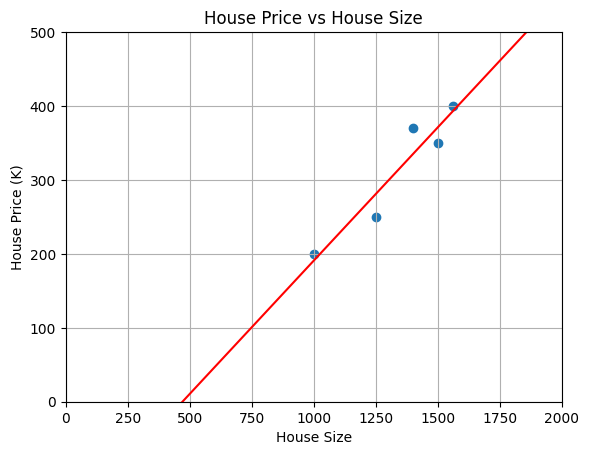

In [20]:
plot_house(data=data_house, b0=b[0], b1=b[1])

### Sklearn - Linear Regression

The Python package `sklearn` provides a function to solve the OLS problem. It's noted that we don't need to add intercepts to the `X` matrix.

In [21]:
from sklearn.linear_model import LinearRegression
X = np.array(data_house['house_size']).reshape((-1, 1))
y = np.array(data_house['house_price_k'])
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [22]:
print("coef.: ", model.coef_)
print("intercept: ", model.intercept_)

coef.:  [0.36049285]
intercept:  -169.78139904610492


We can also use this model to predict a new data point.

In [23]:
new_x = [[750]] # predict house price for 750 sqft house
model.predict(new_x)

array([100.58823529])

## Multi-variable Linear Regression

### Medical insurance dataset

In this section, we will use a real-world dataset to demonstrate the multi-variable linear regression. The dataset contains information about medical insurance costs for 1338 people. The dataset is available on [Kaggle](https://www.kaggle.com/mirichoi0218/insurance).

In [24]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Text(0.5, 1.0, 'Distribution of Charges')

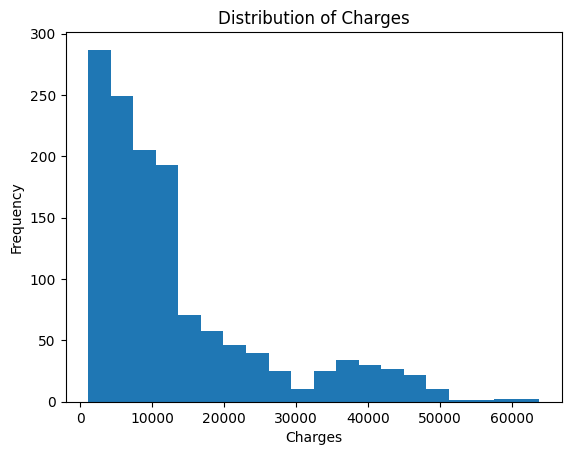

In [155]:
# plot histogram of charges
plt.hist(data['charges'], bins=20)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')

Text(0.5, 1.0, 'Distribution of Charges')

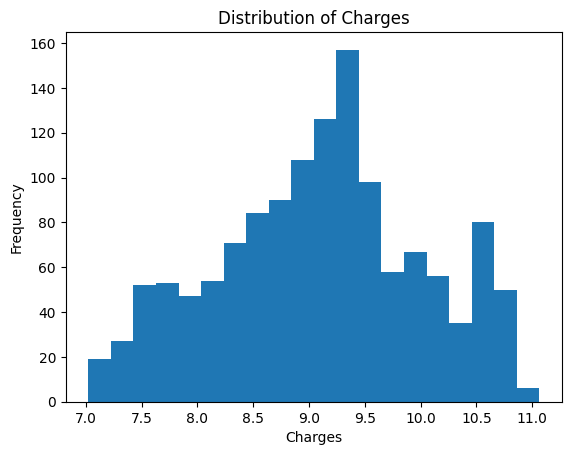

In [156]:
# plot histogram of charges
plt.hist(np.log(data['charges']), bins=20)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')

### The regression problem

Say, we want to know how the listed factors, which include `age`, `sex`, `bmi`, `children`, `smoker`, `region`, affect the `charges` of medical insurance. We can define the hypothesis $h$ as follows:

$$
h(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \beta_8 x_8
$$

where
- $x_1$ = `age`
- $x_2$ = `sex`; 0 for male, 1 for female
- $x_3$ = `bmi`
- $x_4$ = `children`
- $x_5$ = `smoker`; 0 for non-smoker (no), 1 for smoker (yes)
- $x_6$ = `region` is `southwest` (1) or not (0)
- $x_7$ = `region` is `southeast` (1) or not (0)
- $x_8$ = `region` is `northwest` (1) or not (0)


Note that we turned a categorical variable `region` into three binary variables. This is called one-hot encoding.


### Make the matrix $X$ and $y$

Now, let's try to solve this problem using the formula $(1)$. We need to define the matrix $X$ and $y$ before we can compute the $\beta$.

In [32]:
X = data.iloc[:, :-1]
y = data["charges"]
print("X shape:", X.shape)
display(X)
print("y shape:", y.shape)
display(y)

X shape: (1338, 6)


,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


y shape: (1338,)


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### One-hot encoding

We need to encode the categorical variables, such as `sex`, `smoker`, and `region`, to numerical values in the regression problem. The idea is to turn a categorical variable into a set of binary variables. For example, the variable `region` has four categories: `southwest`, `southeast`, `northwest`, and `northeast`. We can turn it into three (not four) binary variables:

- `region` is `southwest` (1) or not (0)
- `region` is `southeast` (1) or not (0)
- `region` is `northwest` (1) or not (0)

We don't need to encode the variable `northeast` because it can be inferred from the other three variables. That is, if all three variables are 0, then the region must be `northeast`.

There is a handy function in `pandas` to do this encoding. It's called `get_dummies()`.

In [34]:
# turn categorical variable into dummy variables
X = pd.get_dummies(X, drop_first=True) # only keep k-1 dummy variables, k is the number of categories
display(X)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


Add intercept to the `X` matrix and turn both `X` and `y` into numpy arraies.

In [27]:
# add intercept
X = np.array(X)
X = np.hstack([np.ones((len(X), 1)), X])
y = np.array(y)

Check the dimensions of `X` and `y`.

In [28]:
print("X shape: ", X.shape)
display(X)
print("y shape: ", y.shape)
display(y)

X shape:  (1338, 12)


array([[ 1.  , 19.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 18.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [ 1.  , 28.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 1.  , 18.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [ 1.  , 21.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 61.  , 29.07, ...,  1.  ,  0.  ,  0.  ]])

y shape:  (1338,)


array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

Plug in the `X` and `y` into the formula $(1)$ to obtain the $\beta$.

### Obtain the $\beta$ manually or using `sklearn`

In [29]:
solve_OLS(X, y)

array([ 1.00754128e+19, -3.05696037e+02, -6.53123219e+02, -1.44338300e+03,
       -2.10892678e+19, -2.10892678e+19,  1.10138550e+19,  1.10138550e+19,
        1.88416000e+05,  1.72032000e+05,  1.43360000e+05,  1.47456000e+05])

We can solve the same problem using the `sklearn` library

In [30]:
X = data.iloc[:, :-1]
X = pd.get_dummies(X, drop_first=True)
y = data["charges"]
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [31]:
print("coef.: ", model.coef_)
print("intercept: ", model.intercept_)

coef.:  [  256.85635254   339.19345361   475.50054515  -131.3143594
 23848.53454191  -352.96389942 -1035.02204939  -960.0509913 ]
intercept:  -11938.53857616715


### Result interpretation

Here is the result we got from the OLS solver:

| variables | coefficients ($\beta$) |
| --- | --- |
| intercept | -11938.54 |
| age | 256.86 |
| bmi | 339.19 |
| children | 475.5 |
| sex_male | -131.31 |
| smoker_yes | 23848.53 |
| region_northwest | -352.96 |
| region_southeast | -1035.02 |
| region_southwest | -960.05 |

How do we inteprate the result? By holding all other variables constant, we can interpret the coefficients as follows:

- a 1-unit increase in `age` is associated with a 256.86-unit increase in `charges`.
- a 1-unit increase in `bmi` is associated with a 339.19-unit increase in `charges`.

or for the categorical variables:

- when `sex` is `male`, the `charges` is 131.31 units lower than when `sex` is `female`.
- when `region` is `northwest`, the `charges` is 352.96 units lower than when `region` is `northeast` (i.e., all other three variables are 0).



### Predict a new data point

With the understanding of the result, we can use the model to predict the `charges` for a new data point. For example, we can predict the `charges` for a person who is:

- 30 years old
- 20 bmi
- has no children
- female
- a smoker
- lives in the `southwest` region

The estimated `charges` is:

$$

\begin{split}
    \hat{y} &= \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \beta_8 x_8 \\
    &= -11938.54 + 256.86 \times 30 + 339.19 \times 20 + 475.5 \times 0 + \\
    &(-131.31) \times 0 + 23848.53 \times 1 + (-352.96) \times 0 + (-1035.02) \times 0 + (-960.05) \times 1 \\
    &= 25439.54
\end{split}

$$

or a person who is:

- 65 years old
- 35 bmi
- has two children
- male
- not a smoker
- lives in the `northeast` region

$$

\begin{split}
    \hat{y} &= -11938.54 + 256.86 \times 65 + 339.19 \times 35 + 475.5 \times 2 + \\
    &(-131.31) \times 1 + 23848.53 \times 0 + (-352.96) \times 0 + (-1035.02) \times 0 + (-960.05) \times 0 \\
    &= 17448.7
\end{split}

$$

It will be much easier to represent the above equation in matrix form:

$$

\begin{bmatrix}
    1 & 30 & 20 & 0 & 0 & 1 & 0 & 0 & 1\\
    1 & 65 & 35 & 2 & 1 & 0 & 0 & 0 & 0

\end{bmatrix}

\begin{bmatrix}
    -11938.54 \\
    256.86 \\
    339.19 \\
    475.5 \\
    -131.31 \\
    23848.53 \\
    -352.96 \\
    -1035.02 \\
    -960.05
\end{bmatrix}

=

\begin{bmatrix}
    25439.54 \\
    17448.7
\end{bmatrix}


## Model evaluation

### Overfitting

Intuitively, as we increase the number of variables in the model, the model will be more accurate. However, this is not always the case. There is a chance that a model with more variables may lose its predictability on new data. This problem is called overfitting. 

### Five-fold validation: 80% training, 20% testing

To demonstrate this problem, we will need to split the data into two parts: training data and testing data. The training data is used to estimate the model coefficients $\beta$, and the testing data is treated as new data to evaluate the model. In a common practice, we use 80% of the data for training and 20% for testing.

In [80]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train shape: ", X_train.shape)
display(X_train)
print("X_test shape: ", X_test.shape)
display(X_test)
print("y_train shape: ", y_train.shape)
display(y_train)
print("y_test shape: ", y_test.shape)
display(y_test)

X_train shape:  (1070, 8)


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
592,20,31.130,2,1,0,0,1,0
916,43,26.885,0,0,1,1,0,0
1006,28,29.260,2,1,0,0,0,0
1185,45,23.560,2,1,0,0,0,0
280,40,28.120,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
567,41,30.590,2,1,0,1,0,0
726,41,28.405,1,1,0,1,0,0
1070,37,37.070,1,1,1,0,1,0
352,30,27.700,0,0,0,0,0,1


X_test shape:  (268, 8)


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
451,30,24.130,1,1,0,1,0,0
1082,38,19.950,1,1,0,1,0,0
998,33,36.290,3,0,0,0,0,0
455,59,37.400,0,1,0,0,0,1
716,49,22.610,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
575,58,27.170,0,0,0,1,0,0
210,20,33.000,1,1,0,0,0,1
471,18,30.115,0,0,0,0,0,0
782,51,35.970,1,1,0,0,1,0


y_train shape:  (1070,)


592      2566.47070
916     21774.32215
1006     4438.26340
1185     8603.82340
280     22331.56680
           ...     
567      7256.72310
726      6664.68595
1070    39871.70430
352      3554.20300
1235     2699.56835
Name: charges, Length: 1070, dtype: float64

y_test shape:  (268,)


451      4032.24070
1082     5855.90250
998      6551.75010
455     21797.00040
716      9566.99090
           ...     
575     12222.89830
210      1980.07000
471      2203.47185
782      9386.16130
787      1917.31840
Name: charges, Length: 268, dtype: float64

### Model selection

We can design several models with different combinations of variables:

- Model A, full model: all eight variables
- Model B, reduced model: `age`, `bmi`, `children`, `smoker`
- Model C, reduced model: `age`, `bmi`,
- Model D, reduced model: `age`

In [83]:
# subset the data based on the variables
var_A = ["age", "bmi", "children", "sex_male", "smoker_yes", "region_northwest", "region_southeast", "region_southwest"]
var_B = ["age", "bmi", "children", "smoker_yes", "region_southeast", "region_southwest"]
var_C = ["age", "bmi", "smoker_yes", "region_southeast"]
var_D = ["age", "smoker_yes"]

## model A
X_train_A = X_train.loc[:, var_A]
X_test_A = X_test.loc[:, var_A]
model_A = LinearRegression()
model_A.fit(X_train_A, y_train)

## model B
X_train_B = X_train.loc[:, var_B]
X_test_B = X_test.loc[:, var_B]
model_B = LinearRegression()
model_B.fit(X_train_B, y_train)

## model C
X_train_C = X_train.loc[:, var_C]
X_test_C = X_test.loc[:, var_C]
model_C = LinearRegression()
model_C.fit(X_train_C, y_train)

# model D
X_train_D = X_train.loc[:, var_D]
X_test_D = X_test.loc[:, var_D]
model_D = LinearRegression()
model_D.fit(X_train_D, y_train)

LinearRegression()

In [84]:
# evaluate using MSE
from sklearn.metrics import mean_squared_error

y_pred_A = model_A.predict(X_test_A)
mse_A = mean_squared_error(y_test, y_pred_A)
print("MSE for model A: ", mse_A)

y_pred_B = model_B.predict(X_test_B)
mse_B = mean_squared_error(y_test, y_pred_B)
print("MSE for model B: ", mse_B)

y_pred_C = model_C.predict(X_test_C)
mse_C = mean_squared_error(y_test, y_pred_C)
print("MSE for model C: ", mse_C)

y_pred_D = model_D.predict(X_test_D)
mse_D = mean_squared_error(y_test, y_pred_D)
print("MSE for model D: ", mse_D)

MSE for model A:  34776935.79071038
MSE for model B:  34494018.90305846
MSE for model C:  35174018.957356684
MSE for model D:  38225666.275530346


### Iterate the validation for 100 times

The evaluation results can be biased due to the data splitting. To reduce the bias, we can repeat the splitting and evaluation for multiple times. In this example, we will repeat the splitting and evaluation for 100 times.

We need to define several functions to reduce the code repetition:

- `subset_X()`: subset the $X$ matrix based on the variable names
- `split_data()`: split the data into training and testing
- `fit_eval_model()`: fit and evaluate the model, return MSE as the evaluation metric

In [87]:
def subset_X(data, var):
    X = data.loc[:, var]
    return X

def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

def fit_eval_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

Full code

In [144]:
# define constants
VAR_A = ["age", "bmi", "children", "sex_male", "smoker_yes", "region_northwest", "region_southeast", "region_southwest"]
VAR_B = ["age", "bmi", "smoker_yes", "region_southeast"]
VAR_C = ["age", "bmi", "smoker_yes"]
VAR_D = ["age", "smoker_yes"]
N_ITER = 500
DICT_MODEL = dict(
    A=dict(var=VAR_A, mse=[]),
    B=dict(var=VAR_B, mse=[]),
    C=dict(var=VAR_C, mse=[]),
    D=dict(var=VAR_D, mse=[]))

# load data
X = data.iloc[:, :-1]
X = pd.get_dummies(X, drop_first=True)
y = data["charges"]

# run experiment
for model in DICT_MODEL:
    # retrieve variables
    var = DICT_MODEL[model]["var"]
    # subset data
    X_sub = subset_X(X, var)

    for i in range(N_ITER):
        # split data
        X_train, X_test, y_train, y_test = split_data(X_sub, y)
        # fit and evaluate model
        mse = fit_eval_model(X_train, X_test, y_train, y_test)
        # store mse
        DICT_MODEL[model]["mse"].append(mse)

Visualize the results

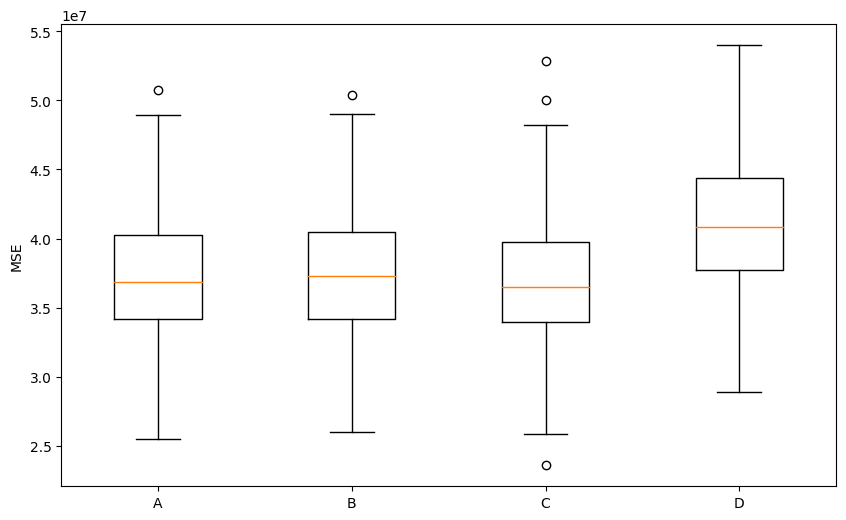

In [145]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([DICT_MODEL[model]["mse"] for model in DICT_MODEL])
ax.set_xticklabels([model for model in DICT_MODEL])
ax.set_ylabel("MSE")
plt.show()

### AIC and BIC

There are two common model selection criteria: Akalke's Information Criterio (AIC) and Bayesian Information Criterion (BIC). The idea of AIC and BIC is to balance the goodness of fit and the complexity of the model. The lower the AIC and BIC, the better the model. The AIC and BIC are defined as:

$$

\begin{split}
    AIC &= -2 \log(L) + 2k \\
    BIC &= -2 \log(L) + k \log(n)
\end{split}

$$

where $L$ is the likelihood of the model, $k$ is the number of parameters, and $n$ is the number of observations. The difference between AIC and BIC is that BIC penalizes the model complexity more than AIC. Empirically, we can replace $L$ with the residual sum of squares (RSS):

$$

\begin{split}
    AIC &= n \log(RSS) + 2k \\
    BIC &= n \log(RSS) + k \log(n)
\end{split}

$$

And the conversion between RSS and MSE is:

$$

\begin{split}
    RSS &= MSE \times n
\end{split}



In [146]:
def get_AIC(MSE, n, k):
    AIC = n * np.log(MSE) + 2 * k
    return AIC

def get_BIC(MSE, n, k):
    BIC = n * np.log(MSE) + k * np.log(n)
    return BIC

In [147]:
# sample size of each fold
n = round(X.shape[0] / 5)

# inspect AIC and BIC for each model
for model in DICT_MODEL:
    mse = np.median(DICT_MODEL[model]["mse"] * n)
    k = len(DICT_MODEL[model]["var"])
    aic = get_AIC(mse, n, k)
    bic = get_BIC(mse, n, k)
    print("Model: ", model, DICT_MODEL[model]["var"])
    print("AIC: ", aic)
    print("BIC: ", bic)


Model:  A ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
AIC:  4685.295570191187
BIC:  4714.0234660352735
Model:  B ['age', 'bmi', 'smoker_yes', 'region_southeast']
AIC:  4680.353803805766
BIC:  4694.71775172781
Model:  C ['age', 'bmi', 'smoker_yes']
AIC:  4672.810124863183
BIC:  4683.583085804716
Model:  D ['age', 'smoker_yes']
AIC:  4700.8466867964125
BIC:  4708.028660757434
